# Video Games Analysis


    1.Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.
    2.Постройте график распределения количества выпущенных игр по годам и выведите описательные характеристики переменной Year.
    3.На каких платформах произошло больше всего релизов?
    4.Игры каких издателей (Publisher) встречаются в датасете чаще всего?
    5.В каком регионе медианное значение объема продаж игр Nintendo является наибольшим? (Регионы: NA, EU, JP, Other)
    6.Изучите объемы продаж игр Nintendo в Японии с разбивкой жанрам. Посмотрите на медиану, среднее, межквартильный размах.
    7.Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports. В какие моменты времени было продано больше всего игр жанра Sports?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Загрузим датасет

In [2]:
df = pd.read_csv('/home/oleg/python/forfun/Portfolio/vgsales.csv.zip')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

### Проверим данные на наличие пропусков и изучим типы данных

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.shape

(16291, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Вывод:
Столбцы Year и Publisher содержади пропущенные значения, поэтому строки с этими значениями были удалены.

### Построим график распределения количества выпущенных игр по годам

In [9]:
ticks = list(range(int(df.Year.min()), int(df.Year.max()), 1))

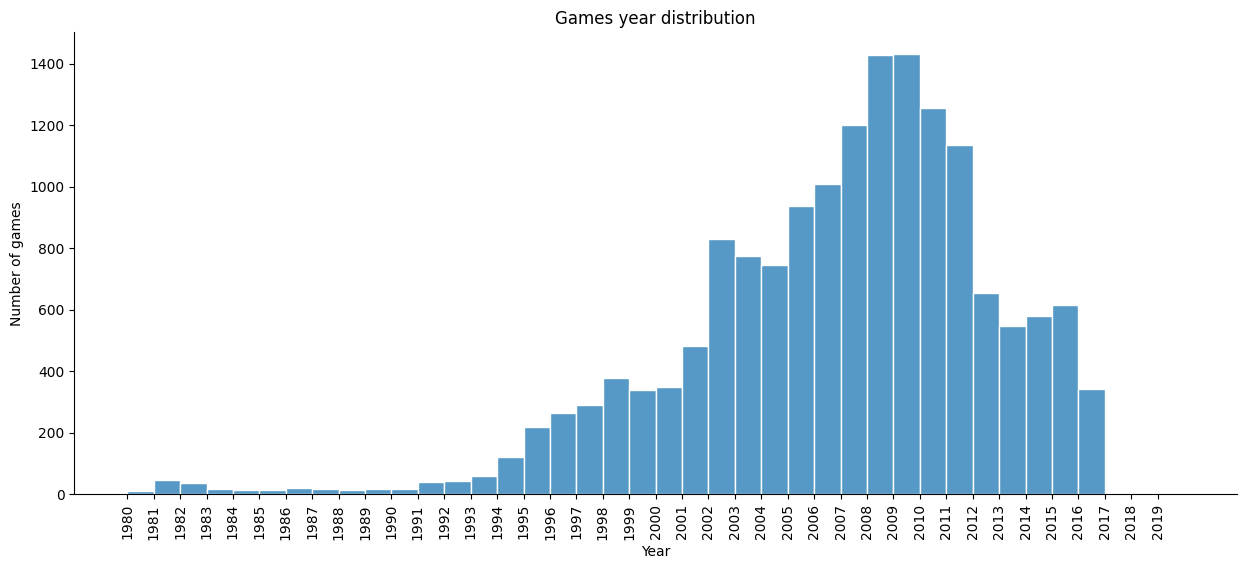

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.set_style("whitegrid")
sns.histplot(data=df, x='Year', bins=int(df.Year.max() - df.Year.min()))
ax.set_title('Games year distribution')
ax.set_ylabel('Number of games')
ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation=90)
sns.despine()

In [11]:
df.Year.describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

### Вывод
С появлением компьютеров начинает развиваться игровая индустрия. Начиная с 1991 года с каждым годом количесвто выпускаемых игр растет. Пик по производству видеоигр наблюдается в 2008-2009 годах. После чего количесвто релизов идет на спад.

### Посмотрим на каких платформах произошло больше всего релизов

In [12]:
df.Platform.nunique()

31

Всего 31 платформа. Выберем 10 платформ выпустивших наибольшее количесвто игр и построим график распределения по годам.

In [13]:
top_10 = df.Platform.value_counts().head(10)
top_10

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

In [14]:
top_plat = df.loc[df['Platform'].isin(list(top_10.index))]

In [15]:
ticks = list(range(int(top_plat.Year.min()), int(top_plat.Year.max()), 1))

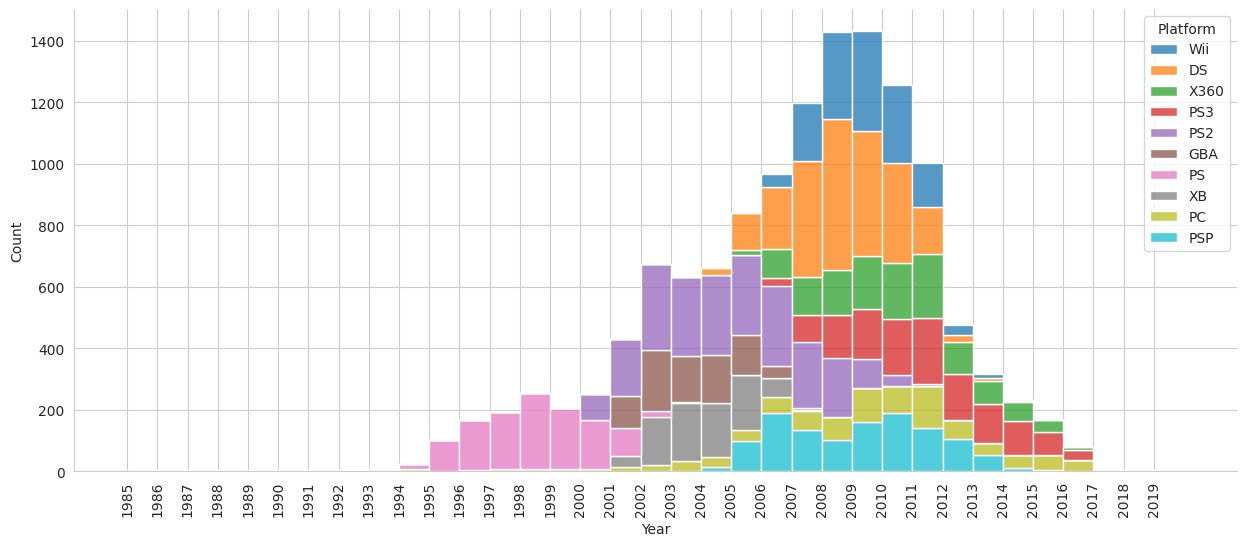

In [16]:
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data=top_plat, x='Year', hue='Platform', bins=int(top_plat.Year.max() - top_plat.Year.min()),
            multiple='stack')
ax.set_xticks(ticks)
ax.set_xticklabels(ticks, rotation=90)
sns.despine()

### Вывод
Выше на графике мы видим количество релизов на различных платформах, начиная с 1985 года. С течением времени, линейка платформ становится шире. С 1994 по 2003 лидерство принадлежит платформе PlayStation(Сначала PS, а затем PS2). В конце нулевых лидерсвто переходит к DS и Wii.
    
Топ 5 платформ: 
- 1 - Wii
- 2 - Ds
- 3 - X360
- 4 - PS(PS, PS_2, PS_3)
- 5 - PC

### Посмотрим, игры каких издателей встречаются чаще всего

In [17]:
top_20_publisher = df\
    .groupby('Publisher', as_index=False)\
    .agg(number_of_games=('Name', 'count'))\
    .sort_values('number_of_games', ascending=False)\
    .head(20)
top_20_publisher

,Publisher,number_of_games
138,Electronic Arts,1339
21,Activision,966
347,Namco Bandai Games,928
524,Ubisoft,918
275,Konami Digital Entertainment,823
487,THQ,712
359,Nintendo,696
455,Sony Computer Entertainment,682
445,Sega,632
493,Take-Two Interactive,412


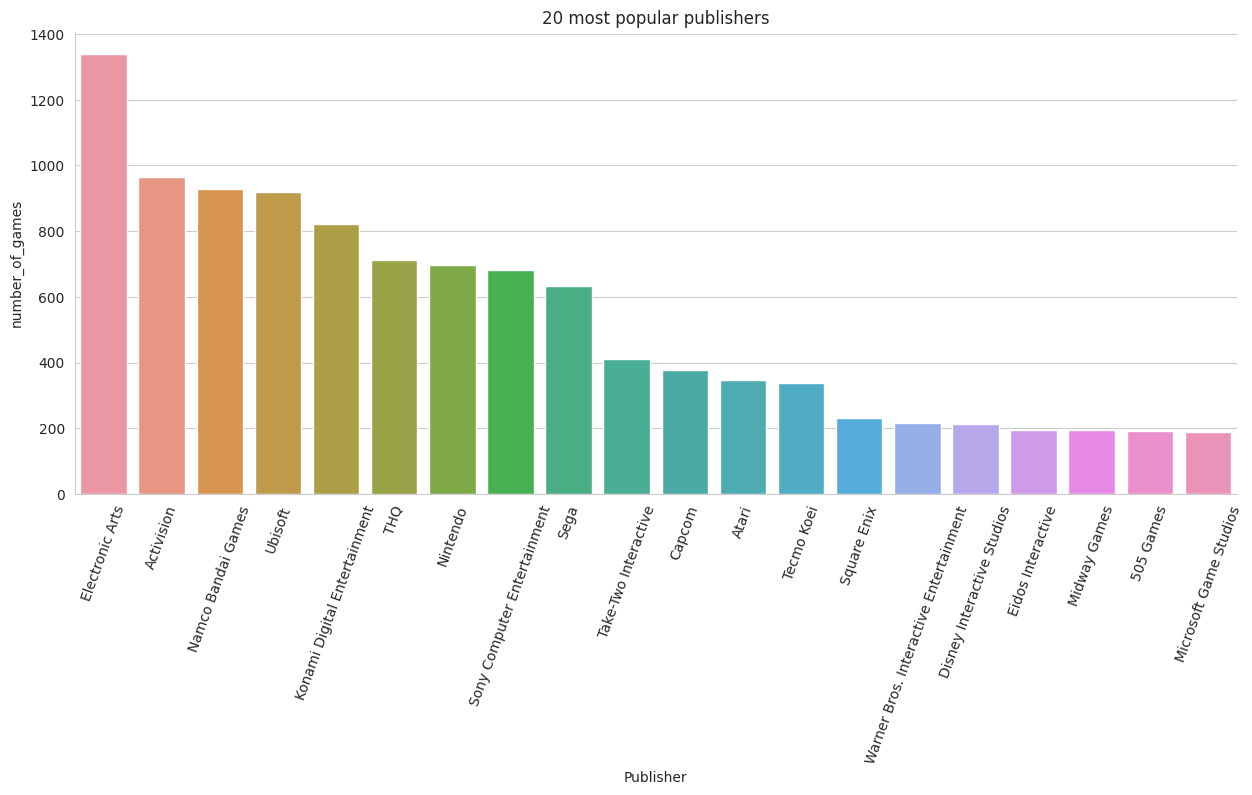

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(data=top_20_publisher, x='Publisher', y='number_of_games')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title('20 most popular publishers')
sns.despine()

Топ 5 издателей видеоигр с 1985 по 2019 годы:
- 1 - Electronic Arts
- 2 - Activision
- 3 - Namco Bandai Games
- 4 - Ubisoft
- 5 - Konami

### В каком регионе медианное значение объема продаж игр Nintendo является наибольшим?

In [19]:
nintendo = df.loc[df['Publisher'] == 'Nintendo']
nintendo_region_sales = nintendo[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].describe()
nintendo_region_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767
std,2.989913,1.743953,1.063110,0.464170
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.007500,0.090000,0.000000
50%,0.375000,0.120000,0.280000,0.030000
75%,0.972500,0.482500,0.740000,0.090000
max,41.490000,29.020000,10.220000,8.460000


### Вывод
В Северной Америке медианный объем продаж является наибольшим и равен 0.375. Это может быть связано, как с численностью населения, так и с популярностью индустрии видеоигр.

### Изучим объемы продаж игр Nintendo в Японии с разбивкой жанрам

In [20]:
nintendo_JP = nintendo[['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'JP_Sales']]
nintendo_JP.head()

,Name,Platform,Year,Genre,Publisher,JP_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,3.77
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,6.81
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,3.79
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,3.28
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,10.22


In [21]:
nint_jp_sales_median = nintendo_JP\
    .groupby('Genre', as_index=False)\
    .agg(median=('JP_Sales','median'))
nint_jp_sales_median

,Genre,median
0,Action,0.170
1,Adventure,0.090
2,Fighting,0.500
3,Misc,0.250
4,Platform,0.540
5,Puzzle,0.255
6,Racing,0.340
7,Role-Playing,0.360
8,Shooter,0.130
9,Simulation,0.390


In [22]:
nint_jp_sales_mean = nintendo_JP\
    .groupby('Genre', as_index=False)\
    .agg(mean=('JP_Sales','mean'))
nint_jp_sales_mean

,Genre,mean
0,Action,0.373846
1,Adventure,0.257429
2,Fighting,0.830000
3,Misc,0.552500
4,Platform,0.922162
5,Puzzle,0.501216
6,Racing,0.789730
7,Role-Playing,0.970952
8,Shooter,0.251250
9,Simulation,0.844643


In [23]:
nint_jp_sales_q1 = nintendo_JP\
    .groupby('Genre', as_index=False)\
    .JP_Sales.quantile(q=0.25)\
    .rename(columns={'JP_Sales':'Q1'})
nint_jp_sales_q1

,Genre,Q1
0,Action,0.0800
1,Adventure,0.0300
2,Fighting,0.1325
3,Misc,0.0500
4,Platform,0.2250
5,Puzzle,0.0800
6,Racing,0.1000
7,Role-Playing,0.1600
8,Shooter,0.0775
9,Simulation,0.0725


In [24]:
nint_jp_sales_q3 = nintendo_JP\
    .groupby('Genre', as_index=False)\
    .JP_Sales.quantile(q=0.75)\
    .rename(columns={'JP_Sales':'Q3'})
nint_jp_sales_q3

,Genre,Q3
0,Action,0.4600
1,Adventure,0.2300
2,Fighting,1.3650
3,Misc,0.7300
4,Platform,1.0800
5,Puzzle,0.6025
6,Racing,0.8900
7,Role-Playing,0.7400
8,Shooter,0.2825
9,Simulation,0.9675


In [25]:
nintendo_stats = nint_jp_sales_median.merge(nint_jp_sales_mean, on='Genre').merge(nint_jp_sales_q1, on='Genre')\
    .merge(nint_jp_sales_q3, on='Genre').sort_values('median', ascending=False)
nintendo_stats['Q3-Q1'] = nintendo_stats.Q3 - nintendo_stats.Q1
nintendo_stats

,Genre,median,mean,Q1,Q3,Q3-Q1
4,Platform,0.540,0.922162,0.2250,1.0800,0.8550
2,Fighting,0.500,0.830000,0.1325,1.3650,1.2325
9,Simulation,0.390,0.844643,0.0725,0.9675,0.8950
7,Role-Playing,0.360,0.970952,0.1600,0.7400,0.5800
6,Racing,0.340,0.789730,0.1000,0.8900,0.7900
5,Puzzle,0.255,0.501216,0.0800,0.6025,0.5225
3,Misc,0.250,0.552500,0.0500,0.7300,0.6800
10,Sports,0.250,0.652182,0.0600,0.7150,0.6550
11,Strategy,0.190,0.337419,0.0600,0.4450,0.3850
0,Action,0.170,0.373846,0.0800,0.4600,0.3800


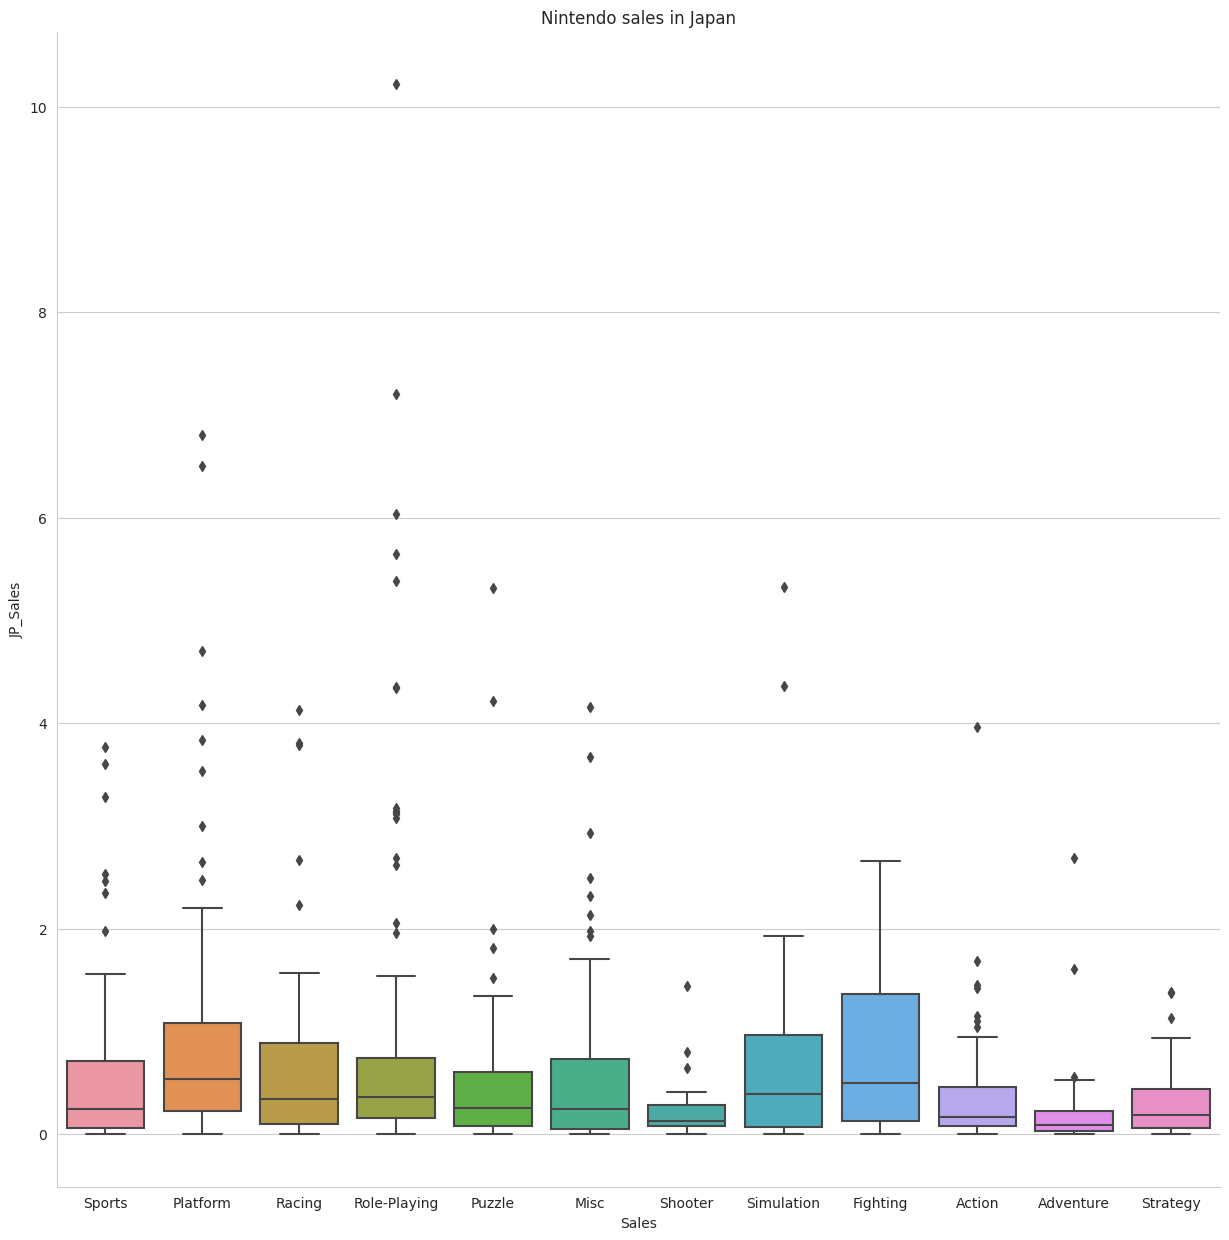

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=nintendo_JP, y='JP_Sales', x='Genre')
ax.set_title('Nintendo sales in Japan')
ax.set_xlabel('Sales')
sns.despine()

### Вывод
Топ 5 самых продаваемых жанров видеоигр в Японии:
- 1 - Platform
- 2 - Fighting
- 3 - Simulation
- 4 - Role-Playing
- 5 - Racing

### Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

In [37]:
nintendo_global = nintendo.query("Genre in ['Sports', 'Platform', 'Racing', 'Simulation', 'Fighting']")\
    .groupby(['Genre', 'Year'], as_index=False).Global_Sales.sum()
nintendo_global.head()

,Genre,Year,Global_Sales
0,Fighting,1987.0,5.42
1,Fighting,1993.0,2.00
2,Fighting,1995.0,3.20
3,Fighting,1996.0,0.99
4,Fighting,1999.0,5.55


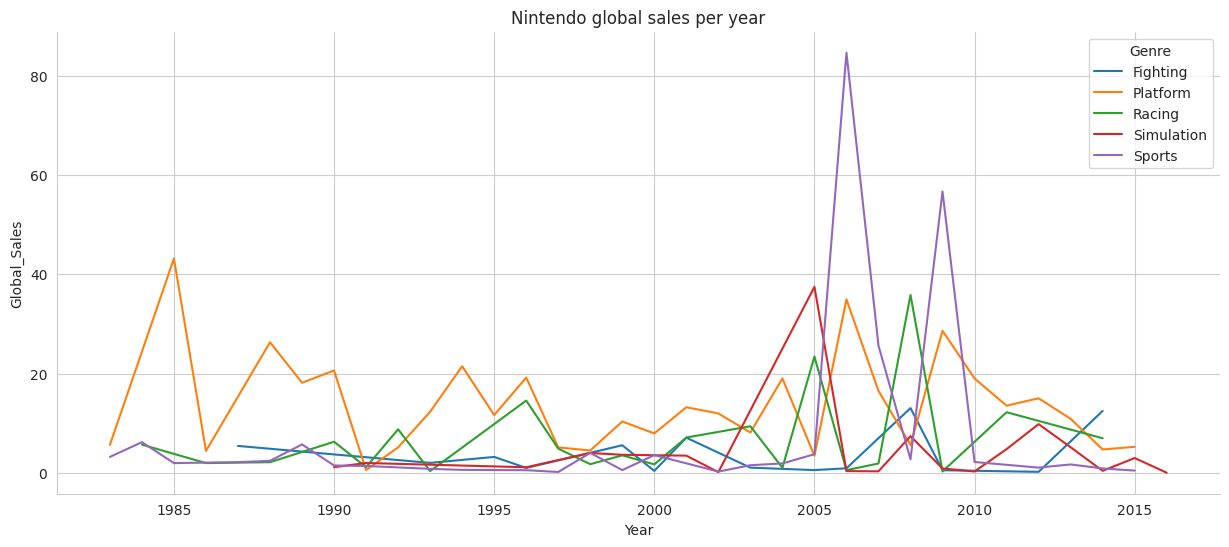

In [39]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=nintendo_global, x='Year', y='Global_Sales', hue='Genre')
ax.set_title('Nintendo global sales per year')
ax.set_xlabel('Year')
sns.despine()

### Вывод
С 1985 по 2003 лидерсвто по объемам продаж принадлежало жанру "Platform". Объемы продаж по остальным жанрам находились на довольно низком уровне, не превышающем 20. С 2003 по 2010 годы произошел бум продаж. Поочередно лидировали жанры "Racing", "Platform", "Simulation" и "Sports". Самым продаваемым в этот период оказался жанр "Sports", с объемами продаж более 80 в 2006 и порядка 60 в 2009.